# Exponential Moving Average

The Exponential Moving Average (EMA) is similar to the simple moving average, but, instead  
of weighing all prices in the history equally, it place more weight on the most recent  
price observation and less weight on the older price observation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('data/ADAUSDT.csv')
df
close = df['Close']

In [4]:
# Number of candles over which to average
num_period = 20
K = 2 / (num_period + 1)
ema_p = 0
ema_values = []

for close_price in close:
    if (ema_p == 0):
        ema_p = close_price
    else:
        ema_p = (close_price - ema_p) * K + ema_p
        
    ema_values.append(ema_p)

In [8]:
df_data = df.assign(ClosePrice=pd.Series(close, index=df.index))
df_data = df_data.assign(Exponential20MovingAverage=pd.Series(ema_values, index=df.index))
close_price = df_data['ClosePrice']
ema = df_data['Exponential20MovingAverage']

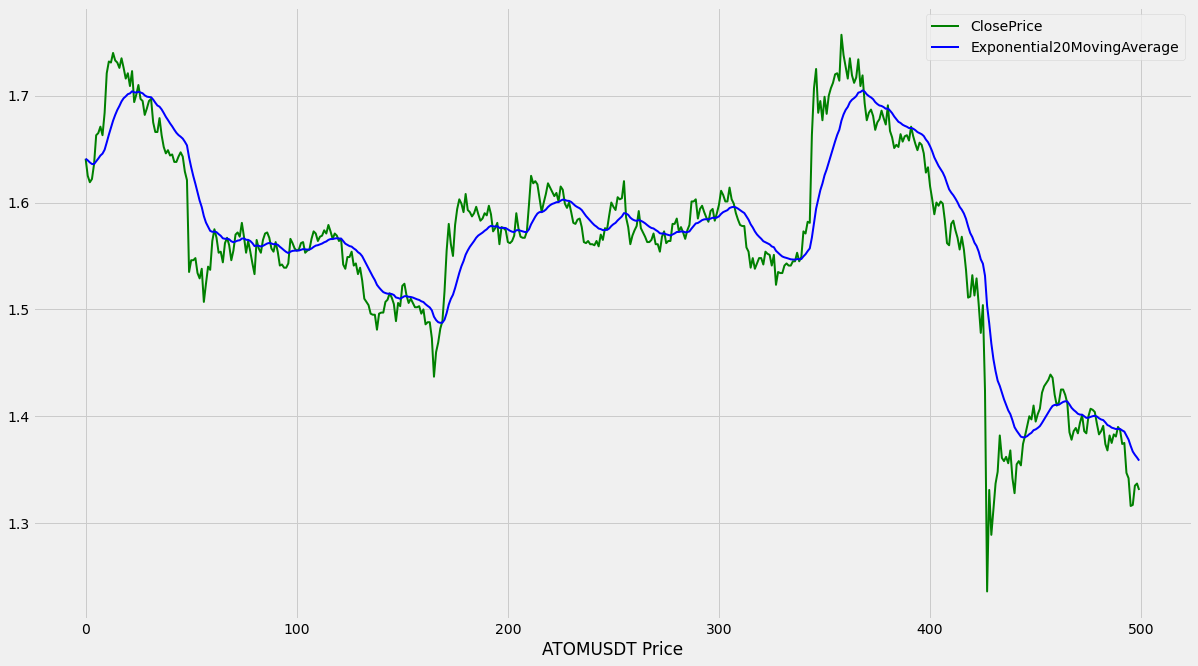

In [10]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax1 = fig.add_subplot(111, xlabel='ATOMUSDT Price')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema.plot(ax=ax1, color='b', lw=2., legend=True)
plt.show()